# Building simple linear regression model

## Introduction

This project will build a simple linear regression model.
The goal is to:
- Build a simple linear regression model to assess the direction and magnitude of relationship between `Sales` and `Media` types for promotions such as ads.
- Make predictions and decisions which media source would be the most effective one to increase total sales.

Before building and executing the linear regression model, basic EDA, data cleaning, and other manipulations will be conducted to prepare the data for modeling.

Modeling follows the steps:
1. Importing packages and loading data
2. Exploring the data and completing the cleaning process
3. Building a simple linear regression model
4. Evaluating the linear regression model using stats and assumptions

### Step 1: Importing packages and loading data

#### 1.1. Import packages

Import relevant Python packages.

In [22]:

# Standard operational packages.
import pandas as pd

# Modeling and evaluation packages.
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

#### 1.2. Load the dataset

Load the `marketing_sales_data.csv` dataset. Save the data to `df`, a pandas `DataFrame` object.

In [23]:
path = '../../../data/'
df = pd.read_csv(path + 'marketing_sales_data.csv')
df

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
...,...,...,...,...,...
567,High,28.210738,4.373466,Micro,302.887998
568,Medium,23.578661,2.856657,Mega,232.555023
569,Low,9.169824,0.067279,Nano,73.888838
570,Low,11.563403,1.727947,Nano,121.949570


### Step 2: Exploring the data and completing the cleaning process

#### 2.1. Prepare the data

After loading the dataset, prepare the data to be suitable for a logistic regression model.
- Exploring the data
- Checking for missing values
- Encoding the data
- Split the `original` dataset into `train` and `test` dataset. 

#### 2.2. Explore the the data

Use functions to take a look at the data
- `shape`
- `info()`

In [24]:
df.shape

(572, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


#### 2.3. Check for missing values

`statmodels` package for linear regression modeling does not support missing values. Check for missing values in the rows of the data.

In [26]:
df.isna().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

#### 2.4. Drop the rows with missing values
- There are `3` missing values in `TV`,`Radio` and `Sales` and they are a small percentage of the total, `572`.
- Assume that they might not impact the relation between `Sales` and/or media types such as `Radio`.
- Remind that the goal of this project is to predict the relation between 1 independent variable and 1 dependent variable.
- So, let's remove them.

In [27]:
print('before drop:\t', df.shape)
df = df.dropna(axis=0).reset_index(drop=True)
print('after drop:\t', df.shape)

before drop:	 (572, 5)
after drop:	 (569, 5)


#### 2.4. Check model assumptions
The focus of this project is to explore the relationship between sales and media type of the promotion.

Now check the data to be suitable for a linear regression model.

- Create a plot of pairwise relationships in the data

#### 2.5. Create a plot of pairwise relationships in the data

- Use `pairplot()` function of `Seaborn` package to visualize the relationships between two variables.

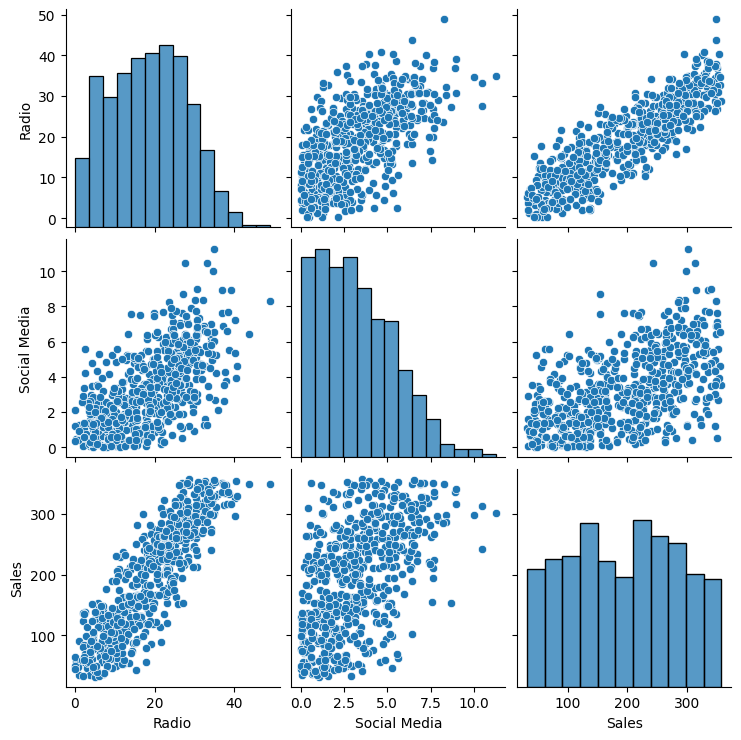

In [28]:
sns.pairplot(data=df)
plt.show()

#### 2.6. Review the scatter plot
- `Sales` over `Radio` appear to cluster around a line that indicates a positive association between the two variables.
- Other media types also have positive linear relationships to `Sales`, but shapes are little bit scattered. 
- Since the points cluster around a line, it seems the assumption of `Linearity` is met.

### Step 3. Building a simple linear regression model

#### 3.1. Select only the columns that are needed for the model that you will build from the data.

In [29]:
ols_data = df[['Radio','Sales']]
ols_data

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
...,...,...
564,28.210738,302.887998
565,23.578661,232.555023
566,9.169824,73.888838
567,11.563403,121.949570


#### 3.2. Write the linear regression formula for modeling the relationship between the two interest variables.

In [30]:
ols_formula = 'Sales ~ Radio'

#### 3.3. Implement the Ordinary Least Squares (OLS) approach for linear regression.

In [31]:
OLS = ols(data=ols_data, formula=ols_formula)

#### 3.4. Create a linear regression model for the data and 

In [32]:
model = OLS.fit()

In [33]:
# Save the model object to make other apps use it.
joblib.dump(model, '../../../model/simple_linear_regression_model.pkl')

['../../../model/simple_linear_regression_model.pkl']

### Step 4: Evaluating the linear regression model using stats and assumptions

#### 4.1. Get a summary of the results from the model

- Use `summary()` function.

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          2.07e-176
Time:                        17:07:28   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4.2. Analyze the bottom table from the results summary

- The slope is `8.1733`
- The intercept is `41.5326`

From these values, the linear equation is
- sales = 8.1733 * radio promotion budget + 41.5326

It implies that 
- If the organization spends `$1M` for `Radio` promotion, its `Sales` would increase `$8.1733M` on average.

#### 4.3. Check model assumptions

To verify whether the linear regression model would be a well built one, check the 4 basic model assumptions.
- `Linearity`: Each predictor variable (Xi) is linearly related to the outcome variable (Y).
- `Normality`: The errors are normally distributed.
- `Independent observations`: Each observation in the dataset is independent.
- `Homoscedasticity`: The variation of the errors is constant or similar across the model.

#### 4.4. Plot the OLS data with the best fit regression line

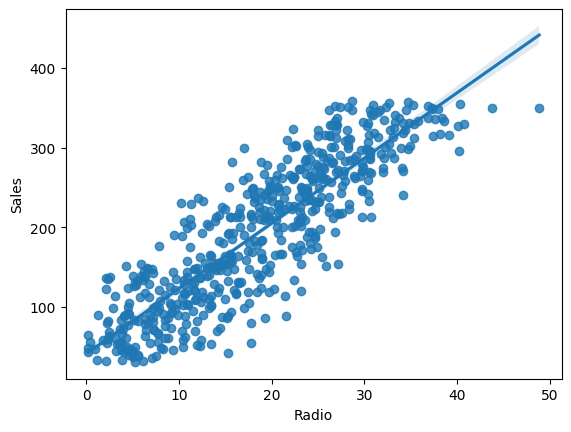

In [35]:
sns.regplot(data=ols_data, x='Radio', y='Sales')
plt.show()

Observation

- The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of `Linearity`.

#### 4.5. Check the normality

- Get the residuals from the model.
- Visualize the distribution of the residuals.

In [36]:
# Get the residuals from the model.
residuals = model.resid
residuals

0      38.563673
1      59.020221
2     -23.574057
3      70.365959
4       8.874344
         ...    
564    30.781101
565    -1.692607
566   -42.591308
567   -14.093977
568   -12.799642
Length: 569, dtype: float64

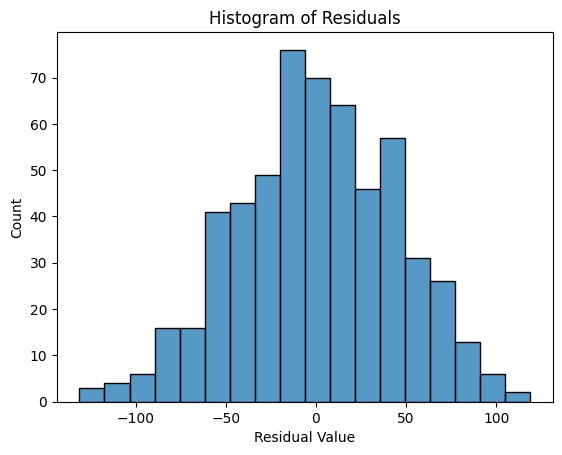

In [37]:
# Visualize the distribution of the residuals
fig = sns.histplot(residuals)
fig.set_xlabel('Residual Value')
fig.set_title('Histogram of Residuals')
plt.show()

Observation

- The histogram illustrates the distribution is approximately normal. This confirms the assumption of `Normality`.

#### 4.6. Create a Q-Q plot to confirm the normality

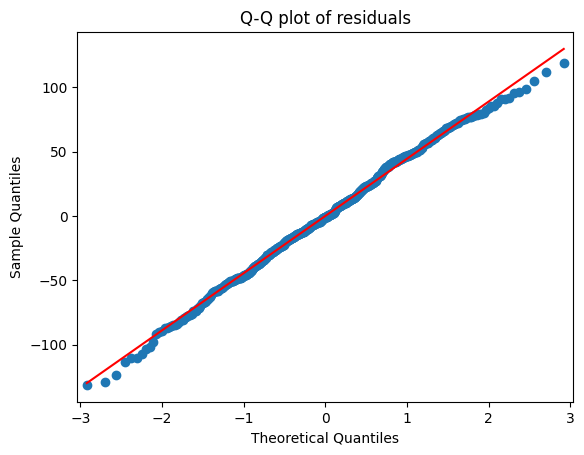

In [38]:
# Create a Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of residuals')
plt.show()

Observation

- the plot shows that the points closely follow a straight diagonal line trending upward. This confirms the assumption of `Normality`.

#### 4.7. Check the homoscedasticity

- Get the fitted values from the model.
- Create a scatter plot of `residuals` against the `fitted values`.

In [39]:
ols_data['Radio']

0       1.218354
1      14.949791
2      10.377258
3      26.469274
4      36.876302
         ...    
564    28.210738
565    23.578661
566     9.169824
567    11.563403
568    18.814801
Name: Radio, Length: 569, dtype: float64

In [40]:
# Get the fitted values from the model
fitted_values = model.predict(ols_data['Radio'])
fitted_values

0       51.490549
1      163.721447
2      126.348847
3      257.873419
4      342.932984
          ...    
564    272.106897
565    234.247630
566    116.480147
567    136.043547
568    195.311256
Length: 569, dtype: float64

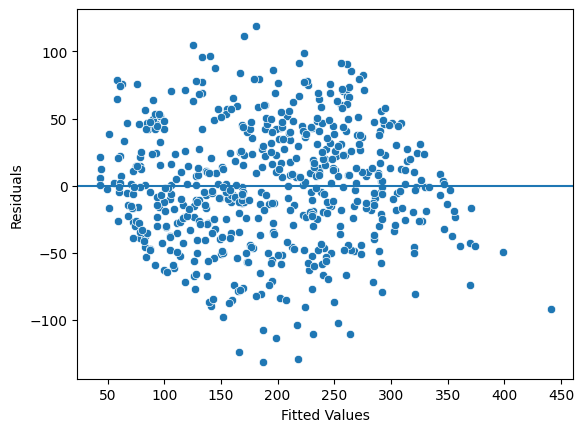

In [41]:
# Create a scatter plot of residuals against the fitted values
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
plt.show()

Observation

- The plot illustrates the data points have a cloud-like resemblance and do not follow an explicit pattern.
- In other words, the data do not violate independent observation assumption.

So, this confirms the assumption of `Homoscedasticity`.

### Conclusion

#### Key takeaways
- Data visualizations and EDA are good to check if linear regression is a well approach for modeling the relationship between two variables.
- The results of the linear regression model explain the relationship between the two variables.

#### Model Summary's details
1. The equation of the model, `Sales` = `8.1733` * `Radio` promotion budget + `41.5326`
- It implies that if a company spends a budget of `$1M` for promoting its product on the `radio`, its sales would increase by approximately `$8M`
2. `p-value` of `0.00` is a very smaller than the common significant level of `0.05`.
- From a hypothesis test perspective, this indicates that the `null` hypothesis can be rejected if the null hypothesis means there is no relationship between `Radio` and `Sales`.
3. The model summary shows the `95%` confidence interval for the slope is from `7.791` to `8.555`. 
- This indicates there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope.

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          2.07e-176
Time:                        17:07:30   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Recommendation
1. The linear regression model provides stakeholders with remarkable insights mentiones above.
- `Radio` would be the best media for the company's promotion.
- The model would predict that other media types wouldn't be the same effect as `Radio`.
2. Multi linear regression model would give us more insights.

#### References

Regression Analysis: Simplify Complex Data Relationships (Coursera)
https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/ungradedLab/354t2/activity-evaluate-simple-linear-regression

Saragih, H.S. *Dummy Marketing and Sales Data*. https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data.